In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import csv

In [4]:
data_keboola = pd.read_csv('out.c-cleaning.ALL_POSITIONS_NEW.csv', encoding='utf-8', low_memory=False)
data_Honza = pd.read_csv('out.c-cleaning.ALL_HONZA_NEW.csv', encoding='utf-8', low_memory=False)
data = pd.concat([data_Honza,data_keboola], ignore_index = True)

In [5]:
data['ROUTE_NAME'] = data['TRIP_ID'].str[:3]

In [6]:
data['DATE'] = data['DATE'] + " 2020"

In [7]:
data['DATE'] = pd.to_datetime(data['DATE'])

In [8]:
data['DAY_OF_WEEK'] = data['DATE'].dt.day_name()

In [9]:
def vyfiltruj_linku(vsechny_linky, tuhle_linku_chci):
    vysledek = []

    for linka in vsechny_linky:
        if linka.startswith(tuhle_linku_chci):
            vysledek.append(linka)

    return vysledek

In [10]:
from typing import List

In [11]:
def lines_by_day(data: pd.DataFrame, start_time: str, end_time: str, line: str, destination: str):
    data_by_time = data[(data['START_TIME'] > start_time) & (data['START_TIME'] < end_time)]
    destination_indicator = (data_by_time['HEADSIGN'] == destination)
    data_by_time = data_by_time[destination_indicator]
    day_lines = []
    
    for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']:
        day_df = data_by_time[data_by_time['DAY_OF_WEEK'] == day]
        day_unicorn = day_df['UNICORN'].unique().tolist()
        day_line = vyfiltruj_linku(day_unicorn, line)
        
        day_lines.append(day_line)
        
    return day_lines

In [12]:
lines1 = lines_by_day(data, '06:30:00', '07:30:00', '333', 'Praha,Kačerov')
lines2 = lines_by_day(data, '07:30:00', '08:30:00', '333', 'Praha,Kačerov')
lines3 = lines_by_day(data, '08:30:00', '10:00:00', '333', 'Praha,Kačerov')

In [13]:
def plot_column(n_rows, col_num, days, labels, axes, min_y, max_y):
    for i in range(n_rows):
        day = days[i]
        label = labels[i]

        for uni in day:
            columns = data[data['UNICORN'] == uni][['DELAY_STOP_DEPARTURE','SHAPE_DIST_TRAVELED']].sort_values(by='SHAPE_DIST_TRAVELED')
            min_y = min(columns['DELAY_STOP_DEPARTURE'].min(), min_y)
            max_y = max(columns['DELAY_STOP_DEPARTURE'].max(), max_y)
            axes[i][col_num].plot(columns['SHAPE_DIST_TRAVELED'],columns['DELAY_STOP_DEPARTURE'], linestyle = '-', marker = '.',label=uni)
            axes[i][col_num].legend(bbox_to_anchor=(1.05, 1), loc='upper left',borderaxespad=0.)
            axes[i][col_num].set_xlabel('UJETA VZDALENOST v km')
            axes[i][col_num].set_ylabel('ZPOZDENI v sekundach')
            axes[i][col_num].set_title(label)
    for ax in axes:
        for x in ax:
            x.set_ylim(min_y, max_y)

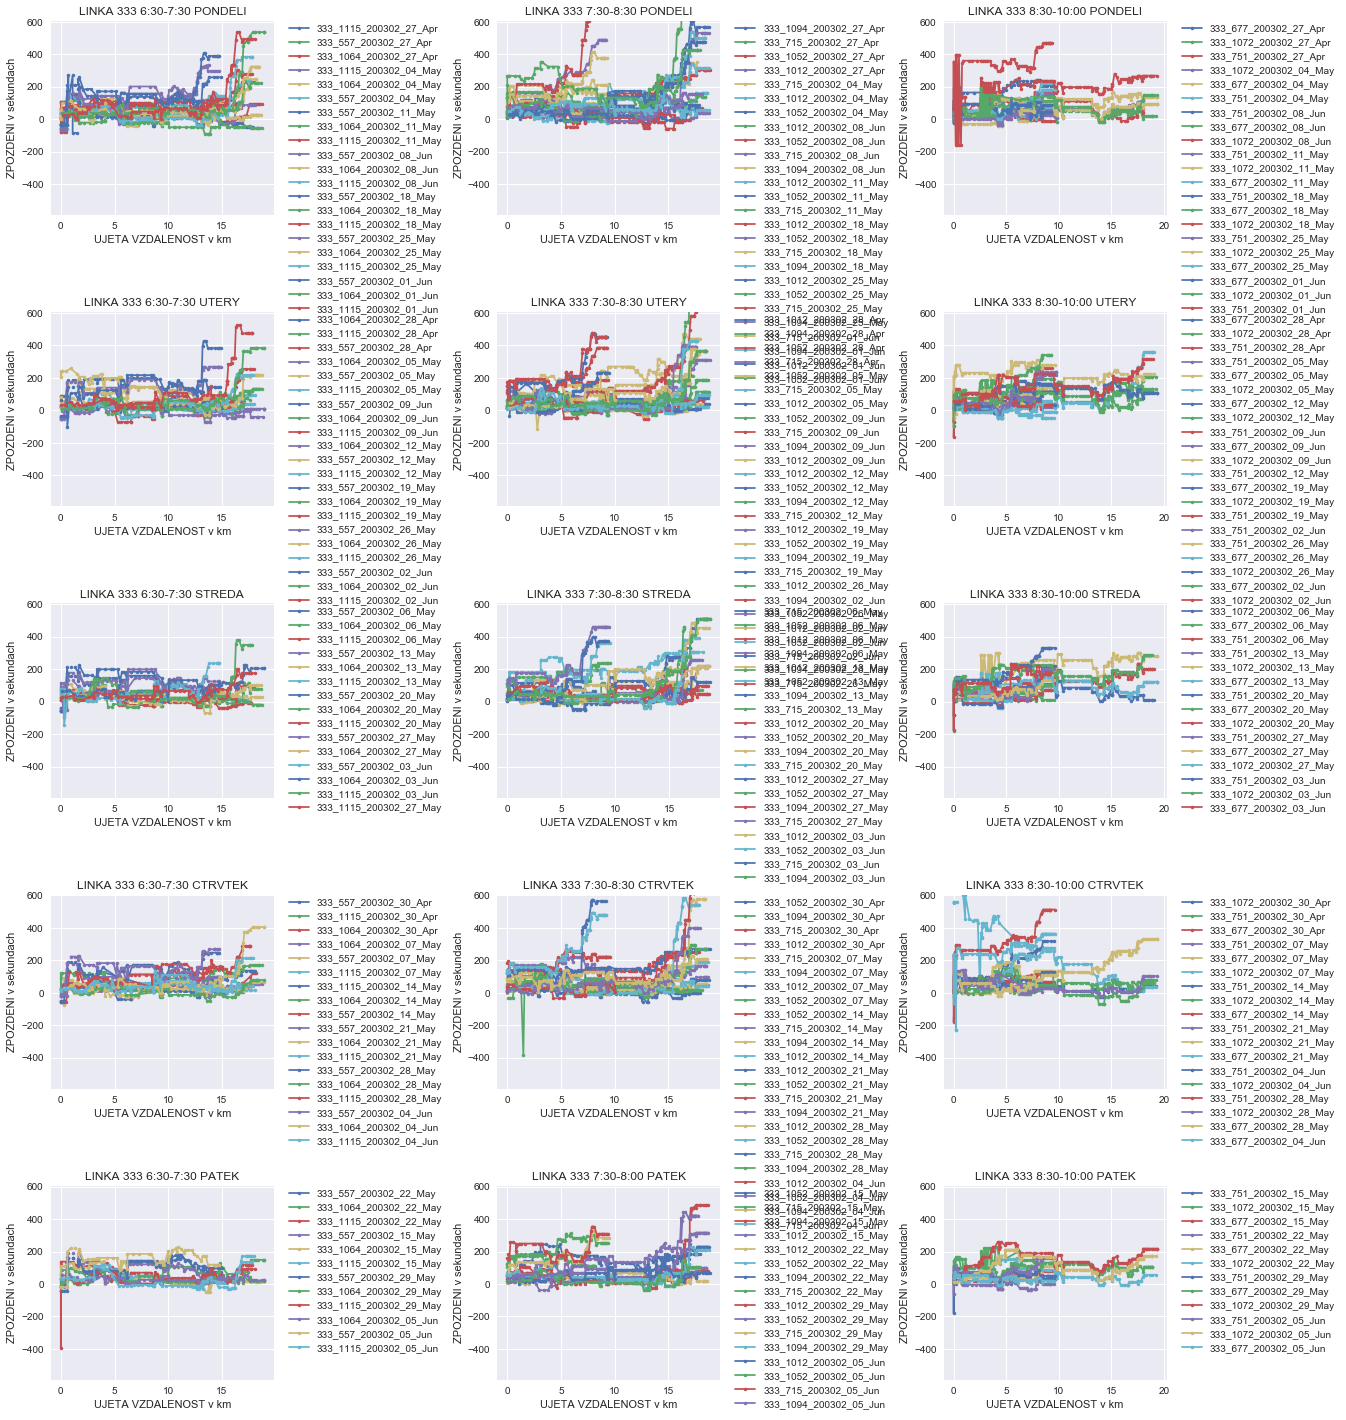

In [15]:
n_days = 5
n_times = 3

fig, axes = plt.subplots(nrows=n_days, ncols=n_times, figsize=(20,25))
min_y = 500
max_y = -100

days = [lines1, lines2, lines3]
labels = [
    ['LINKA 333 6:30-7:30 PONDELI','LINKA 333 6:30-7:30 UTERY','LINKA 333 6:30-7:30 STREDA','LINKA 333 6:30-7:30 CTRVTEK','LINKA 333 6:30-7:30 PATEK'],
    ['LINKA 333 7:30-8:30 PONDELI','LINKA 333 7:30-8:30 UTERY','LINKA 333 7:30-8:30 STREDA','LINKA 333 7:30-8:30 CTRVTEK','LINKA 333 7:30-8:00 PATEK'],
    ['LINKA 333 8:30-10:00 PONDELI','LINKA 333 8:30-10:00 UTERY','LINKA 333 8:30-10:00 STREDA','LINKA 333 8:30-10:00 CTRVTEK','LINKA 333 8:30-10:00 PATEK']
]

for i in range(n_times):
    plot_column(n_days, i, days[i], labels[i], axes, min_y, max_y)
    
#axes.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.)
plt.style.use('seaborn')
plt.subplots_adjust(hspace=0.5, wspace=1)